# Introducción a la series de tiempo

El siguiente cuaderno tiene como objetivo introducir al lector al manejo básico de las series de tiempo en python.

Las librerías necesarias son:
  * pandas
  * matplotlib



In [29]:
import os
print(os.getcwd())

C:\Users\Angel Resendiz Plata\AppData\Local\Programs\Microsoft VS Code


In [30]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
url = r"C:\Users\Angel Resendiz Plata\OneDrive\Documentos\Programación\4Geeks\Guía programa\23.- Time Series Forecasting\Ejercicios\Datos\acea-water-prediction\Aquifer_Petrignano.csv"

In [32]:
df = pd.read_csv(url)

In [33]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [34]:
df2 = df[["Date","Depth_to_Groundwater_P24","Depth_to_Groundwater_P25"]]
df2

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25
0,14/03/2006,-22.48,-22.18
1,15/03/2006,-22.38,-22.14
2,16/03/2006,-22.25,-22.04
3,17/03/2006,-22.38,-22.04
4,18/03/2006,-22.60,-22.04
...,...,...,...
5218,26/06/2020,-25.68,-25.07
5219,27/06/2020,-25.80,-25.11
5220,28/06/2020,-25.80,-25.19
5221,29/06/2020,-25.78,-25.18


In [35]:
df2.dtypes

Date                         object
Depth_to_Groundwater_P24    float64
Depth_to_Groundwater_P25    float64
dtype: object

# visualizar
elementos importantes como la tendencia y la estacionariad son importantes para modelar las series financieras, así que es importante poder visualizar.

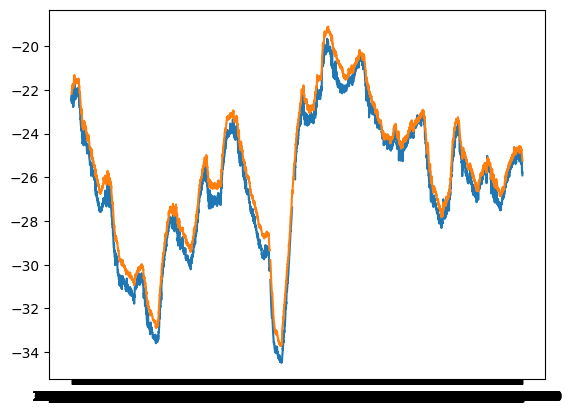

In [27]:
plt.plot(df2['Date'], df2['Depth_to_Groundwater_P24'])
plt.plot(df2['Date'], df2['Depth_to_Groundwater_P25'])

# Tunning the graph
we can uses:
  * plt.title()
  * plt.xlabel()
  * plt.ylabel()

Text(0.5, 0, 'time')

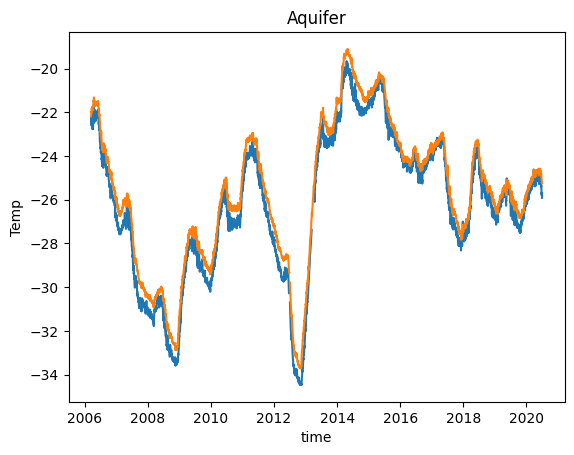

In [63]:
plt.plot(df2['Date'], df2['Depth_to_Groundwater_P24'])
plt.plot(df2['Date'], df2['Depth_to_Groundwater_P25'])
plt.title("Aquifer")
plt.ylabel("Temp")
plt.xlabel("time")

In [68]:

df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Angel Resendiz Plata\AppData\Local\Temp\ipykernel_10544\2689635685.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [69]:
df2.dtypes

Date                        datetime64[ns]
Depth_to_Groundwater_P24           float64
Depth_to_Groundwater_P25           float64
time                        datetime64[ns]
day                                  int32
day_name                            object
dtype: object

Pasar de string to datetime nos permite realizar operaciones sobre las fechas, como extarér el día, sumar etc..


In [70]:
print(df2['Date'].min())
print(df2['Date'].max()) # fecha más reciente en la base

2006-03-14 00:00:00
2020-06-30 00:00:00


In [76]:
df2['Date'].max() - df2['Date'].min() #timestamp, #timedelta

Timedelta('5222 days 00:00:00')

In [77]:
# Extaer información relevante para analizar, por ejempo los días, los meses, etc..
df2['day'] = df2['Date'].dt.day

C:\Users\Angel Resendiz Plata\AppData\Local\Temp\ipykernel_10544\154666153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day'] = df2['Date'].dt.day


In [78]:
df2.tail()

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day,day_name
5218,2020-06-26,-25.68,-25.07,2020-06-26,26,Friday
5219,2020-06-27,-25.80,-25.11,2020-06-27,27,Saturday
5220,2020-06-28,-25.80,-25.19,2020-06-28,28,Sunday
5221,2020-06-29,-25.78,-25.18,2020-06-29,29,Monday
5222,2020-06-30,-25.91,-25.25,2020-06-30,30,Tuesday


In [79]:
df2['day_name'] = df2['Date'].dt.day_name()
# prueba con month, year

C:\Users\Angel Resendiz Plata\AppData\Local\Temp\ipykernel_10544\3586030179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day_name'] = df2['Date'].dt.day_name()


In [80]:
df2['day_name']

0         Tuesday
1       Wednesday
2        Thursday
3          Friday
4        Saturday
          ...    
5218       Friday
5219     Saturday
5220       Sunday
5221       Monday
5222      Tuesday
Name: day_name, Length: 5223, dtype: object

In [107]:
# analizar las transacciones en un día particiular puede ser importante...
# podriamos realziar un ejercicio de comparación usando ANOVA?
df2.head()

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day,day_name
Date,,,,,,
2006-03-14,2006-03-14,-22.48,-22.18,2006-03-14,14,Tuesday
2006-03-15,2006-03-15,-22.38,-22.14,2006-03-15,15,Wednesday
2006-03-16,2006-03-16,-22.25,-22.04,2006-03-16,16,Thursday
2006-03-17,2006-03-17,-22.38,-22.04,2006-03-17,17,Friday
2006-03-18,2006-03-18,-22.60,-22.04,2006-03-18,18,Saturday


In [84]:
# promedio de cierre por día
df2.groupby([df2["Date"].dt.day_name()])['Depth_to_Groundwater_P24'].mean()

Date
Friday      -26.294804
Monday      -26.226829
Saturday    -26.310068
Sunday      -26.223274
Thursday    -26.272263
Tuesday     -26.248051
Wednesday   -26.270568
Name: Depth_to_Groundwater_P24, dtype: float64

In [85]:
# precio de cierre por mes y día de la semana
df2.groupby([df2["Date"].dt.month, df2["Date"].dt.day_name()])['Depth_to_Groundwater_P24'].mean()
# interesante observe el septimo mes en cada día

Date  Date     
1     Friday      -26.710645
      Monday      -26.737705
      Saturday    -26.812787
      Sunday      -26.741967
      Thursday    -26.817143
                     ...    
12    Saturday    -27.272063
      Sunday      -27.182540
      Thursday    -27.014746
      Tuesday     -27.060645
      Wednesday   -27.128689
Name: Depth_to_Groundwater_P24, Length: 84, dtype: float64

In [109]:
df2.head()

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day,day_name
Date,,,,,,
2006-03-14,2006-03-14,-22.48,-22.18,2006-03-14,14,Tuesday
2006-03-15,2006-03-15,-22.38,-22.14,2006-03-15,15,Wednesday
2006-03-16,2006-03-16,-22.25,-22.04,2006-03-16,16,Thursday
2006-03-17,2006-03-17,-22.38,-22.04,2006-03-17,17,Friday
2006-03-18,2006-03-18,-22.60,-22.04,2006-03-18,18,Saturday


Text(0, 0.5, 'mean price')

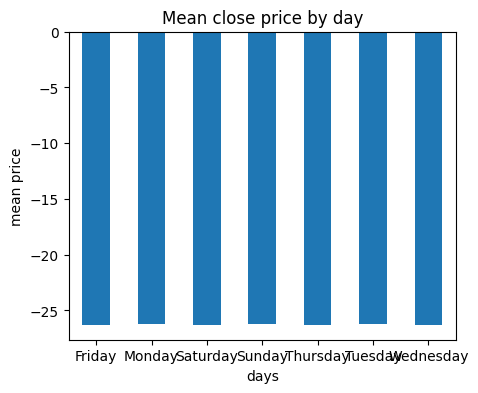

In [87]:
# gráficando el día
fig, axs = plt.subplots(figsize=(5,4))
df2.groupby(df2["Date"].dt.day_name())["Depth_to_Groundwater_P24"].mean().plot(
    kind='bar', rot=0, ax=axs)
plt.title("Mean close price by day")
plt.xlabel("days")
plt.ylabel("mean price")

In [88]:
# datetime como index
df2.set_index(df['Date'], inplace=True) #Una ventaja  el ajuste de las fechas

In [108]:
df2.head()

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day,day_name
Date,,,,,,
2006-03-14,2006-03-14,-22.48,-22.18,2006-03-14,14,Tuesday
2006-03-15,2006-03-15,-22.38,-22.14,2006-03-15,15,Wednesday
2006-03-16,2006-03-16,-22.25,-22.04,2006-03-16,16,Thursday
2006-03-17,2006-03-17,-22.38,-22.04,2006-03-17,17,Friday
2006-03-18,2006-03-18,-22.60,-22.04,2006-03-18,18,Saturday


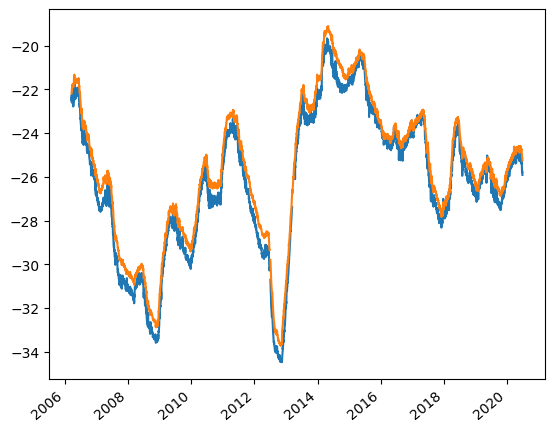

In [91]:
plt.plot(df2['Depth_to_Groundwater_P24'])
plt.plot(df2['Depth_to_Groundwater_P25'])
plt.xticks(rotation=40, ha='right'); #not show text

In [97]:
# determinando el índice podemos usar el slicing...
df2['2020-06-01':'2020-06-30']
df2.head()

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day,day_name
Date,,,,,,
2006-03-14,2006-03-14,-22.48,-22.18,2006-03-14,14,Tuesday
2006-03-15,2006-03-15,-22.38,-22.14,2006-03-15,15,Wednesday
2006-03-16,2006-03-16,-22.25,-22.04,2006-03-16,16,Thursday
2006-03-17,2006-03-17,-22.38,-22.04,2006-03-17,17,Friday
2006-03-18,2006-03-18,-22.60,-22.04,2006-03-18,18,Saturday


<Axes: xlabel='Date'>

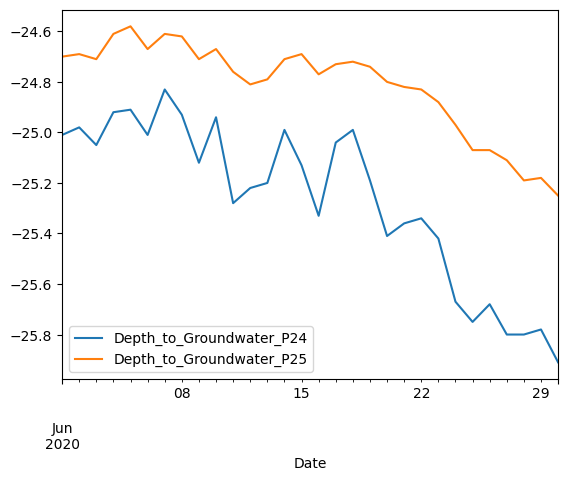

In [96]:
df2['2020-06-01':'2020-06-30'][['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25']].plot()

In [111]:
df2["month"] = pd.to_datetime(df2.month, format = "%b").dt.month
df2["Date"] = pd.to_datetime(df2[["year", "month"]].assign(day = 1))
df2 = df2.set_index("date")
ts = df2["Depth_to_Groundwater_P24"]
ts.head()

AttributeError: 'DataFrame' object has no attribute 'month'